In [1]:
# Basic Neural Network

In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
#Create a Model Class that inherits an nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) --> Hidden Layer (# of neurons) --> Hidden Layer 2 (# of neuros) --> Output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_feature)
    def forward(self, x):
        x = f.relu(self.fc1(x)) #Rectified Linear Unit. If output < 0, call it 0 and move on. Else, use output.
        x = f.relu(self.fc2(x))
        x = f.relu(self.out(x))
        
        return x
        

In [4]:
#Manual seed
torch.manual_seed(41)

model = Model()

In [5]:
#Load and preprocess data
df = pd.read_csv("iris.csv")
df['species'] = df['species'].replace('setosa', 0)
df['species'] = df['species'].replace('versicolor', 1)
df['species'] = df['species'].replace('virginica', 2)
df.head()

C:\Users\rohit\AppData\Local\Temp\ipykernel_21588\1817793093.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#Train Test Split! 

X = df.drop(['species'], axis=1)
Y = df['species']

X = X.values
Y = Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [7]:
#Convert labels to tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)


In [8]:
#Set the criterion of model to measure the error

criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer and learning rate (if error doesn't go down after epochs, lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [9]:
# Train the model
epochs = 100  # Number of epochs to train the model
losses = []   # List to store loss values at each epoch

# Training loop
for epoch in range(epochs):
    # Forward pass: compute predicted y by passing X to the model
    y_pred = model.forward(X_train)
    
    # Compute and print loss
    loss = criterion(y_pred, Y_train)
    losses.append(loss.detach().numpy())
    
    if epoch % 10 == 0:
        print(f'No. of Epoch: {epoch}. Loss: {loss.item()}')  # Use .item() to get the scalar value of the loss
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


No. of Epoch: 0. Loss: 1.1221736669540405
No. of Epoch: 10. Loss: 1.0063387155532837
No. of Epoch: 20. Loss: 0.8365880250930786
No. of Epoch: 30. Loss: 0.6398993134498596
No. of Epoch: 40. Loss: 0.43431395292282104
No. of Epoch: 50. Loss: 0.26471954584121704
No. of Epoch: 60. Loss: 0.15821123123168945
No. of Epoch: 70. Loss: 0.10502949357032776
No. of Epoch: 80. Loss: 0.08256678283214569
No. of Epoch: 90. Loss: 0.07264795899391174


Text(0, 0.5, 'Loss/Error')

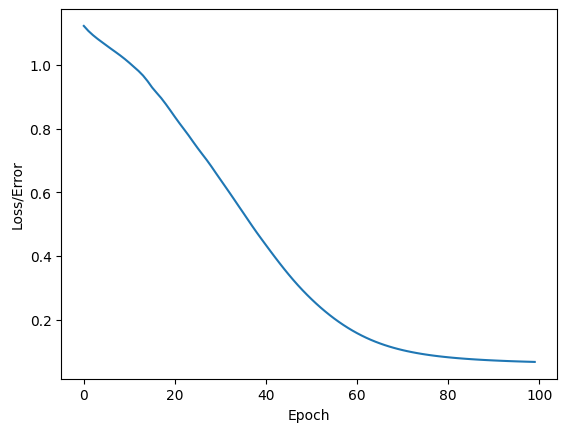

In [10]:
#Graph Loss vs Epoch 

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')

In [11]:
with torch.no_grad(): #Turn off back propogation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, Y_test) #Find loss or error
loss

tensor(0.0500)

In [12]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        #What flower out network thinks it is
        print(f'{i+1}. {str(y_val)} \t {Y_test[i]} \t {y_val.argmax().item() == Y_test[i]}')
        
        #Correct or not
        if y_val.argmax().item() == Y_test[i]:
            correct += 1

print(f'Score: {correct}/30')

1. tensor([11.6580,  5.1572,  0.0000]) 	 0 	 True
2. tensor([3.9597, 7.1078, 0.1978]) 	 1 	 True
3. tensor([2.2065, 9.5610, 3.9315]) 	 1 	 True
4. tensor([11.0090,  4.8955,  0.0000]) 	 0 	 True
5. tensor([ 0.0000, 10.7747, 12.9093]) 	 2 	 True
6. tensor([0.9411, 9.2902, 6.2738]) 	 1 	 True
7. tensor([ 0.0000,  9.6489, 12.1244]) 	 2 	 True
8. tensor([9.7441, 4.9211, 0.0000]) 	 0 	 True
9. tensor([9.5467, 4.3060, 0.0000]) 	 0 	 True
10. tensor([ 0.0000,  9.4483, 14.7790]) 	 2 	 True
11. tensor([1.2753, 8.3307, 4.8176]) 	 1 	 True
12. tensor([10.6111,  4.9396,  0.0000]) 	 0 	 True
13. tensor([ 0.0000,  9.5206, 14.6930]) 	 2 	 True
14. tensor([1.6999, 9.4557, 4.7667]) 	 1 	 True
15. tensor([0.7628, 8.7858, 6.2903]) 	 1 	 True
16. tensor([9.3052, 4.2086, 0.0000]) 	 0 	 True
17. tensor([2.1712, 8.5169, 3.2418]) 	 1 	 True
18. tensor([0.3987, 8.3486, 6.7189]) 	 1 	 True
19. tensor([10.3932,  4.8900,  0.0000]) 	 0 	 True
20. tensor([10.1476,  4.5482,  0.0000]) 	 0 	 True
21. tensor([0.8043, 8.

In [13]:
new_iris = torch.Tensor([5.0,3.6,1.4,0.2])

In [14]:
with torch.no_grad():
    print(model(new_iris))

tensor([10.2728,  4.5987,  0.0000])


In [15]:
torch.save(model, 'model.pt')